# Laboratório #2

### ATENCÃO

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  

<IPython.core.display.Javascript object>


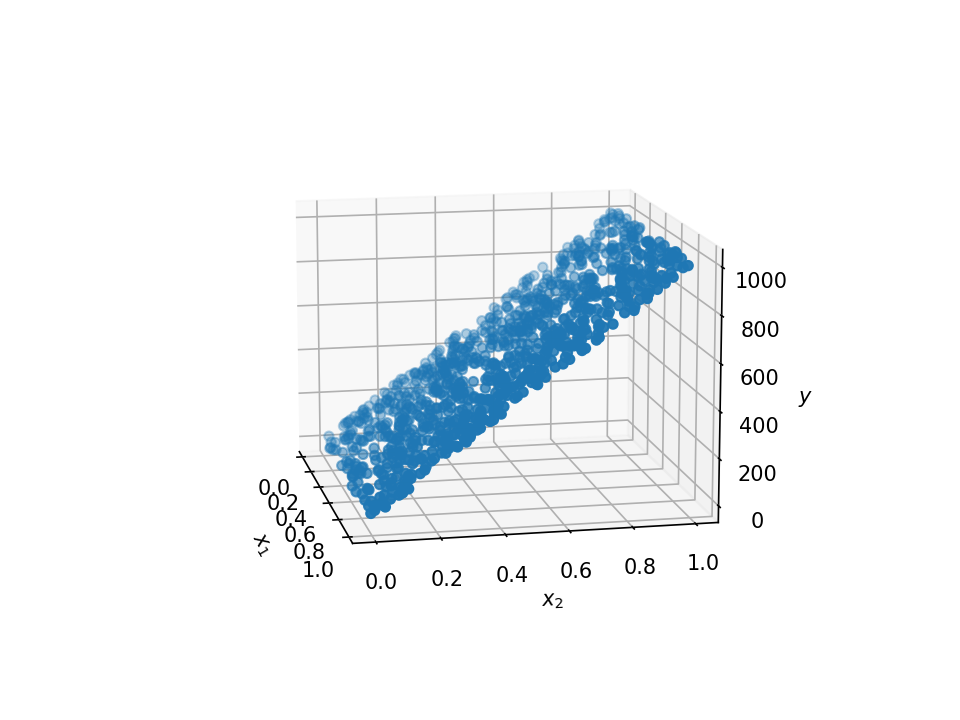

In [2]:
# Digite aqui o código do exercício.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# para figuras interativas usar 'notebook' ao inves de 'inline'
%matplotlib notebook

# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(10119)

# Number of examples.
N = 1000

x1 = np.random.rand(N,1)
x2 = np.random.rand(N,1)
w = np.random.randn(N,1)

# Função objetivo.
y = x1 + 1000*x2

# Função observável (ruidosa)
y_noisy = y + w

# Plot cost-function surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x1,x2,y_noisy)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.show()

#### 2)  

In [3]:
def calculateErrorSurface(y, x1, x2):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-2.0, 4.0, N)
    a2 = np.linspace(-2.0, 4.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y - yhat));            
            
    return J, A1, A2


X = np.c_[x1,x2]

# Equação normal.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)

Joptimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))

<IPython.core.display.Javascript object>


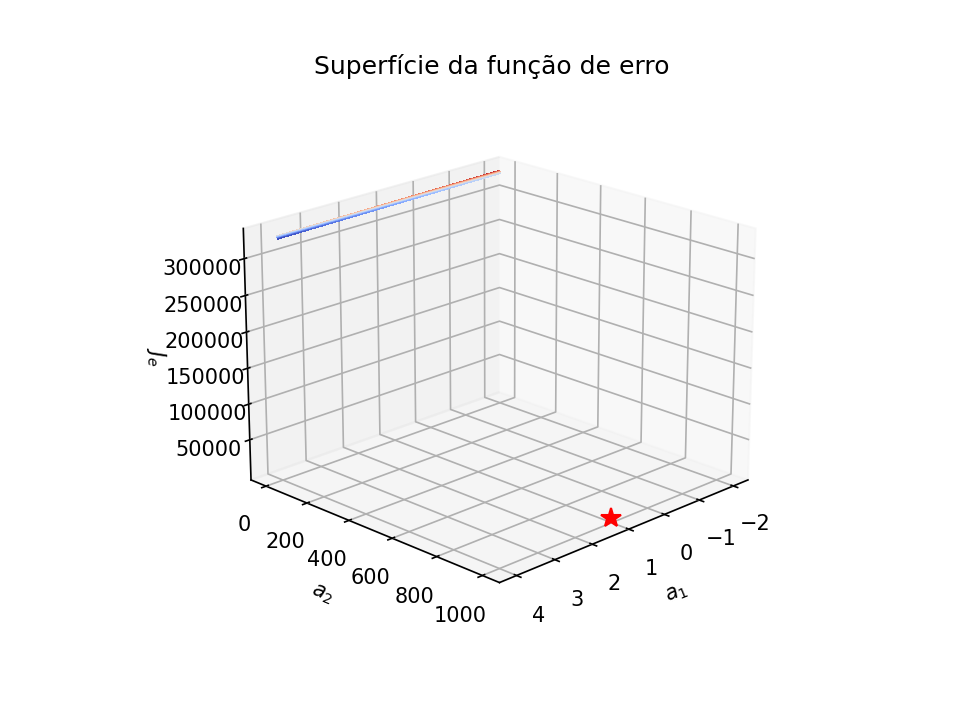

In [4]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot(a_opt[0,0],a_opt[1,0], Joptimum, c='r', marker='*', markersize=10)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');
plt.title('Superfície da função de erro')
ax.view_init(20, 45)
plt.savefig("error_surface_example2.png", dpi=600)
#Show the plot.
plt.show()